<a href="https://colab.research.google.com/github/NeutralTBR/ScienCompute-Lab/blob/main/Sesi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
a = [[8, 3, -3], [-2, -8, 5], [3, 5, 10]]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

matrix is diagonally dominant


In [8]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

In [9]:
print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
  x1 = (14-3*x2+3*x3)/8
  x2 = (5+2*x1-5*x3)/(-8)
  x3 = (-8-3*x1-5*x2)/(10)
  x = np.array([x1, x2, x3])
  # check if it is smaller than thershold
  dx = np.sqrt(np.dot(x-x_old, x-x_old))

  print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
  if dx < epsilon:
    converged = True
    print('Converged!')
    break
  
  #assign the latest x value to the old value
  x_old = x

if not converged:
  print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, -0.7937
2, 1.8508, -1.5838, -0.5633
3, 2.1327, -1.5103, -0.6847
4, 2.0596, -1.5678, -0.6340
5, 2.1002, -1.5463, -0.6569
6, 2.0835, -1.5565, -0.6468
7, 2.0911, -1.5520, -0.6513
Converged!


In [2]:
import numpy as np

A = np.array([[4, 3, -5],
             [-2, -4, 5],
             [8, 8, 0]])
y = np.array([2, 5, -3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


In [3]:
import numpy as np

A_inv = np.linalg.inv(A)

x = np.dot(A_inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.37404698]
 [1.03693961]]


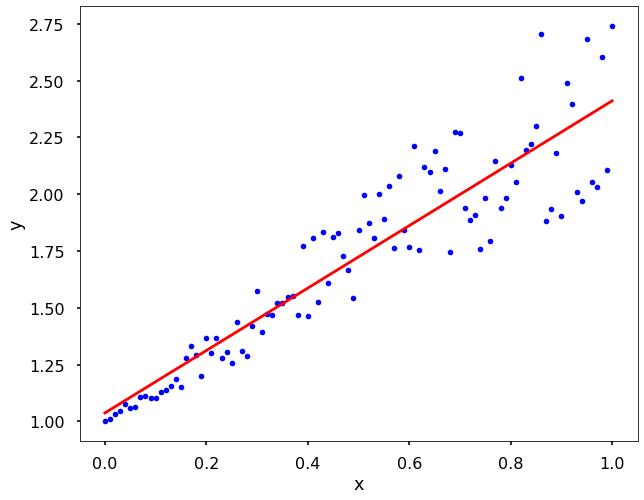

In [6]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.37404698]
 [1.03693961]]


In [8]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.37404698]
 [1.03693961]]


In [9]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.53983672 0.97673886]


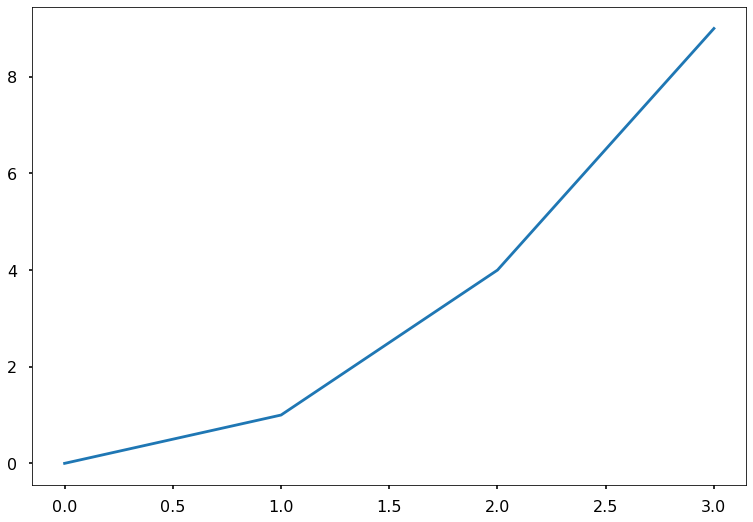

In [10]:
import numpy as numpy
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
y = [0, 1, 4, 9]

plt.plot(x,y)
plt.show()

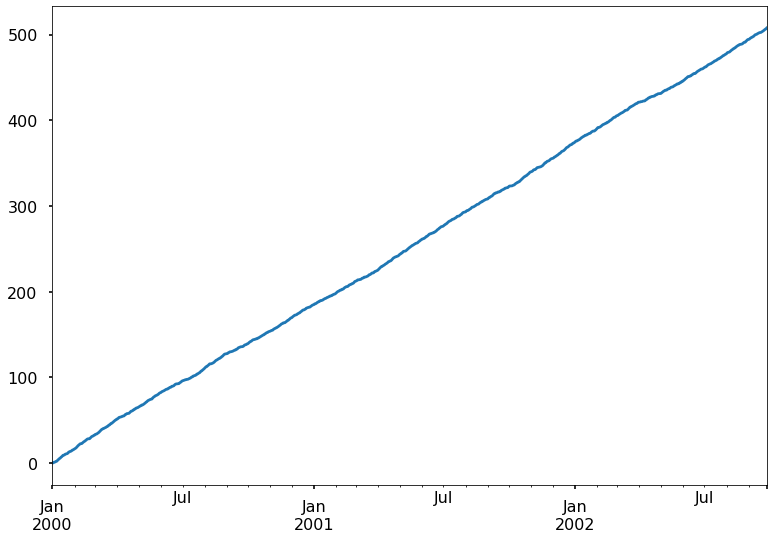

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

ts= pd.Series(np.random.rand(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 921.6x633.6 with 0 Axes>

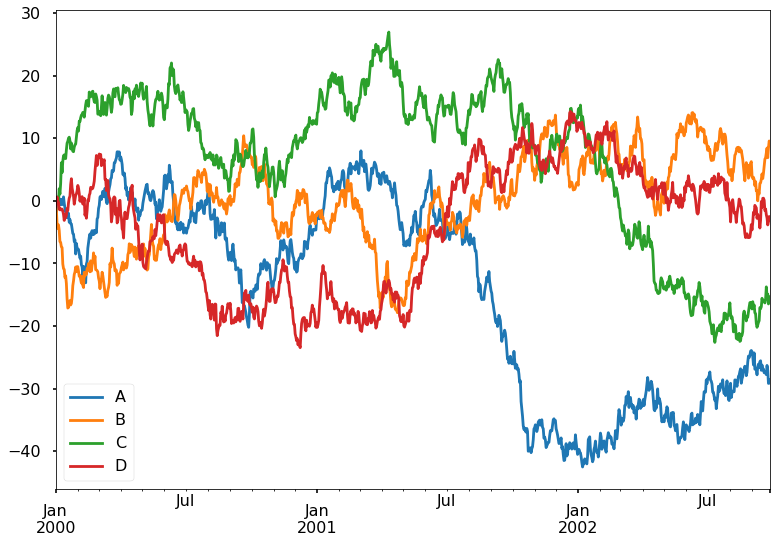

In [12]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()

plt.figure();

df.plot();